#### (1) Global Thresholding

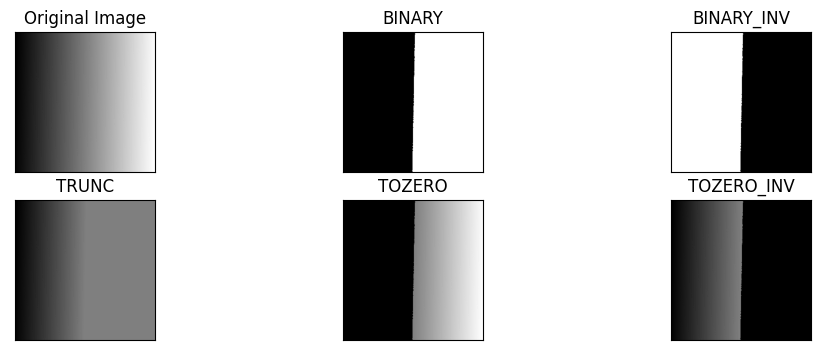

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../data/gradient.png',0)

_,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) # 경계치보다 작으면 0, 크면 255
_,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) # 경계치보다 작으면 255, 크면 0
_,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC) # 경계치보다 작으면 원래있던 값 유지, 크면 127
_,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
_,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(12,4))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

#### (2) Otsu Algorithm

In [2]:
import cv2
import numpy as np

img = cv2.imread('../data/gradient.png',0)

th1, mask = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 

otsu_thr, otsu_mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # 최적의 임계값을 알아서 찾아냄

print(f'Otsu threshold: {otsu_thr}')

cv2.imshow('threshold=127',mask)
cv2.imshow('Otsu',otsu_mask)
cv2.waitKey()
cv2.destroyAllWindows()

Otsu threshold: 126.0


#### (2) Adaptive thresholding

In [3]:
img = cv2.imread('../data/sudoku.png',0) # 그림자가 존재하는 이미지

th1, mask = cv2.threshold(img,127,255,cv2.THRESH_BINARY) # 127로 thresholding을 하면 그림자 부분이 크게 나타남
cv2.imshow('binary threshold = 127',mask)
cv2.waitKey()
cv2.destroyAllWindows()

otsu_thr, otsu_mask = cv2.threshold(img,127,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # otsu알고리즘을 통해 최적의 임계값으로 thresholding을 하면 그림자가 많이 제거됨

cv2.imshow('Ostu threshold = {:g}'.format(otsu_thr), otsu_mask)
cv2.waitKey()
cv2.destroyAllWindows()

`cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)`

Parameters:	
>- src – grayscale image
>- maxValue – 임계값
>- adaptiveMethod – thresholding value를 결정하는 계산 방법
>- thresholdType – threshold type
>- blockSize – thresholding을 적용할 영역 사이즈
>- C – 평균이나 가중평균에서 차감할 값

Adaptive Methods
>- cv2.ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로 결정
>- cv2.ADAPTIVE_THRESH_GAUSSIAN_C :

In [4]:
adapt_mask = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 6)

cv2.imshow('binary threshold = 127',mask)
cv2.imshow('Ostu threshold = {:g}'.format(otsu_thr), otsu_mask)
cv2.imshow('adaptive threshold',adapt_mask)
cv2.waitKey()
cv2.destroyAllWindows()

#### (3) Prefilters


In [5]:
img = cv2.imread('../data/sudoku.png',0)

mask = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 6)

blur = cv2.GaussianBlur(img,(11,11),0)
blur_mask = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 6)

cv2.imshow('without prefilter',mask)
cv2.imshow('after prefiltering',blur_mask) # 어느정도의 salt잡음들이 사라진 것을 확인할 수 있음
cv2.waitKey()
cv2.destroyAllWindows()

#### (4) Morphological Filter

In [6]:
closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE,cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),iterations=1)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),iterations=1)

cv2.imshow('without prefilter',mask)
cv2.imshow('after prefiltering',blur_mask)
cv2.imshow('opening',opened)
cv2.imshow('closing',closed)
cv2.waitKey()
cv2.destroyAllWindows()

#### (5) 2진 영상의 응용 예 1: Mask

In [7]:
# 크로마키

import cv2
import numpy as np

# Camera 객체를 생성 후 사이즈르 320 X 240 으로 조정.
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

while(1):
    # camera에서 frame capture.
    ret, frame = cap.read()

    if ret:
        
        frame = cv2.GaussianBlur(frame,(7,7),0)

        # BGR->HSV로 변환
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # blue 영역의 from ~ to
        # Red 원색의 Hue는 0, Green 원색의 Hue는 60, Blue 원색의 Hue는 120
        lower_blue = np.array([105, 100, 100])
        upper_blue = np.array([135, 255, 255])

        #이미지에서 blue영역
        mask = cv2.inRange(hsv, lower_blue, upper_blue)

        #bit연산자를 통해서 blue영역만 남김.
        res = cv2.bitwise_and(frame, frame, mask = mask)

        cv2.imshow('frame', frame)
        cv2.imshow('mask', mask)
        cv2.imshow('res', res)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

#### (6) 2진 영상의 응용 2: Object detection

In [8]:
img = cv2.imread('../data/35.bmp')
rows,cols=img.shape[:2]
img = img[rows//4:rows//2+rows//4,cols//4:cols//2+cols//4,:].copy()

grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

grey = cv2.GaussianBlur(grey,(11,11),0)

mask = cv2.adaptiveThreshold(grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 6)

res = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('input',img)
cv2.imshow('objects',res)
cv2.waitKey()
cv2.destroyAllWindows()